# Assignment1
### Name: Shubham Chemate
### Roll Number: 31118

#### Q. Access the open source dataset "Titanic" and apply pre-processing techniques on the raw dataset

In [1]:
!py -m pip install matplotlib seaborn --quiet

You should consider upgrading via the 'C:\Users\Shubham\AppData\Local\Programs\Python\Python38-32\python.exe -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import numpy as py
import seaborn as sns

In [3]:
df=pd.read_csv("titanic.csv")

In [4]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [5]:
df.shape

(1310, 14)

In [16]:
df = df.drop(["cabin", "name", "ticket", "pclass"], axis=1)

In [17]:
df.head(20)

,survived,sex,age,sibsp,parch,fare,embarked,boat,body,home.dest
0,1.0,female,29.0000,0.0,0.0,211.3375,S,2,NaN,"St Louis, MO"
1,1.0,male,0.9167,1.0,2.0,151.5500,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,0.0,female,2.0000,1.0,2.0,151.5500,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,0.0,male,30.0000,1.0,2.0,151.5500,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,0.0,female,25.0000,1.0,2.0,151.5500,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1.0,male,48.0000,0.0,0.0,26.5500,S,3,NaN,"New York, NY"
6,1.0,female,63.0000,1.0,0.0,77.9583,S,10,NaN,"Hudson, NY"
7,0.0,male,39.0000,0.0,0.0,0.0000,S,NaN,NaN,"Belfast, NI"
8,1.0,female,53.0000,2.0,0.0,51.4792,S,D,NaN,"Bayside, Queens, NY"
9,0.0,male,71.0000,0.0,0.0,49.5042,C,NaN,22.0,"Montevideo, Uruguay"


Checking how many null values are present in each column

In [18]:
df.isnull().sum()

survived        1
sex             1
age           264
sibsp           1
parch           1
fare            2
embarked        3
boat          824
body         1189
home.dest     565
dtype: int64

<AxesSubplot:xlabel='age', ylabel='Count'>

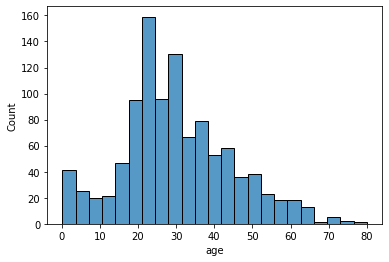

In [19]:
df["age"].dtypes
sns.histplot(df["age"])

Replacing all the null values with the median of the 'Age' column. By inserting median of Age at null values , central value increases

In [21]:
df["age"] = df["age"].fillna(df["age"].median())

Replacing all the null values with the maximum occurring value (mode) in the 'Embarked' column.

In [23]:
df["embarked"] = df["embarked"].fillna(df["embarked"].mode()[0])

In [24]:
df.isnull().sum()

survived        1
sex             1
age             0
sibsp           1
parch           1
fare            2
embarked        0
boat          824
body         1189
home.dest     565
dtype: int64

<AxesSubplot:xlabel='age', ylabel='Count'>

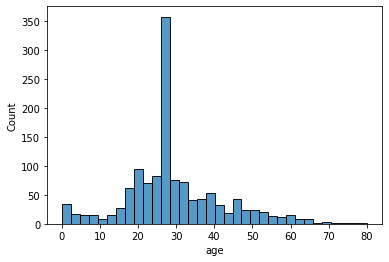

In [25]:
sns.histplot(df["age"])

In [26]:
df.dtypes

survived     float64
sex           object
age          float64
sibsp        float64
parch        float64
fare         float64
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

Replace the gender with 0/1

0 for male and 1 for female

In [27]:
df.loc[df["sex"] == "male", "Sex"] = 0
df.loc[df["sex"] == "female", "Sex"] = 1

Replace the categorical value in Embarked column with a numerical value ranging between zero and the total number of classes minus one.

In [30]:
from sklearn.preprocessing import LabelEncoder

In [31]:
cat_num = ['embarked']
le = LabelEncoder()
for i in cat_num:
    df[i] = le.fit_transform(df[i])

In [32]:
df.head()

,survived,sex,age,sibsp,parch,fare,embarked,boat,body,home.dest,Sex
0,1.0,female,29.0000,0.0,0.0,211.3375,2,2,NaN,"St Louis, MO",1.0
1,1.0,male,0.9167,1.0,2.0,151.5500,2,11,NaN,"Montreal, PQ / Chesterville, ON",0.0
2,0.0,female,2.0000,1.0,2.0,151.5500,2,NaN,NaN,"Montreal, PQ / Chesterville, ON",1.0
3,0.0,male,30.0000,1.0,2.0,151.5500,2,NaN,135.0,"Montreal, PQ / Chesterville, ON",0.0
4,0.0,female,25.0000,1.0,2.0,151.5500,2,NaN,NaN,"Montreal, PQ / Chesterville, ON",1.0


In [33]:
df.groupby(['survived']).size()

survived
0.0    809
1.0    500
dtype: int64

In [34]:
df.describe()

,survived,age,sibsp,parch,fare,embarked,body,Sex
count,1309.000000,1310.000000,1309.000000,1309.000000,1308.000000,1310.000000,121.000000,1309.000000
mean,0.381971,29.502036,0.498854,0.385027,33.295479,1.493893,160.809917,0.355997
std,0.486055,12.900383,1.041658,0.865560,51.758668,0.814053,97.696922,0.478997
min,0.000000,0.166700,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,22.000000,0.000000,0.000000,7.895800,1.000000,72.000000,0.000000
50%,0.000000,28.000000,0.000000,0.000000,14.454200,2.000000,155.000000,0.000000
75%,1.000000,35.000000,1.000000,0.000000,31.275000,2.000000,256.000000,1.000000
max,1.000000,80.000000,8.000000,9.000000,512.329200,2.000000,328.000000,1.000000


In [35]:
df.to_csv('titanic_new.csv')